# Libraries

In [1]:
import os

In [2]:
!pip uninstall joblib
!pip install joblib==1.2.0

Found existing installation: joblib 1.1.1
Uninstalling joblib-1.1.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/joblib-1.1.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/joblib/*
Proceed (Y/n)? Y
  Successfully uninstalled joblib-1.1.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 6.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [3]:
#collab
from google.colab import drive

In [4]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PY4BD/Rice/

Mounted at /content/drive
/content/drive/MyDrive/PY4BD/Rice


In [5]:
os.environ['RICEDATA']='/content/drive/MyDrive/PY4BD/Rice/data/output/2023-03-28'

In [6]:
from Rice_keras import *

# Initializing evaluation

In [7]:
!ls /content/drive/MyDrive/PY4BD/Rice/data/output/2023-03-28/

fit_data  inverters.zip  prod  raw_fit_data


In [8]:
joblib.load(prodpath('Logistic','fitted_models',ext='.joblib'))

LogisticRegression(max_iter=5000)

In [9]:
cmd                   = lambda spc,t='tranformers': ['unzip','-p',f'{DATA_DIR}/inverters.zip',f'inverters/gray/{t}/{spc}.joblib']

tranformers           = { key : joblib.load(BytesIO(subprocess.run(cmd(spc,'transformers'),stdout=subprocess.PIPE).stdout))  

                                for spc,key in Evaluator.all_species.items()
            }

inverse_tranformers   = { key : joblib.load(BytesIO(subprocess.run(cmd(spc,'inverse_transformers'),stdout=subprocess.PIPE).stdout))  

                                for spc,key in Evaluator.all_species.items()
            }

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://sci

# Karacadag new unlabeled example

Karacadag:   0%|          | 0/1 [00:00<?, ?it/s]

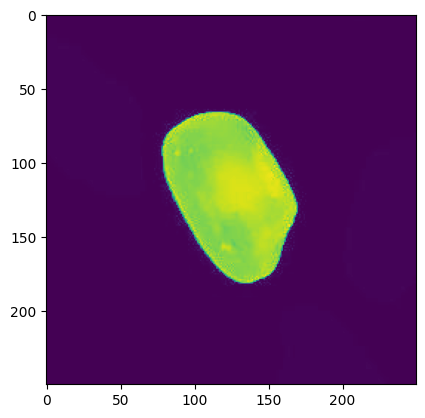

In [10]:
Karacadag_array   = [*MyRiceImgReader('Karacadag',gs=True,zip='data/archive.zip',max_imgs=1).images_arrays({})][0]
plt.imshow(Karacadag_array)

### Transforming Karacadag image

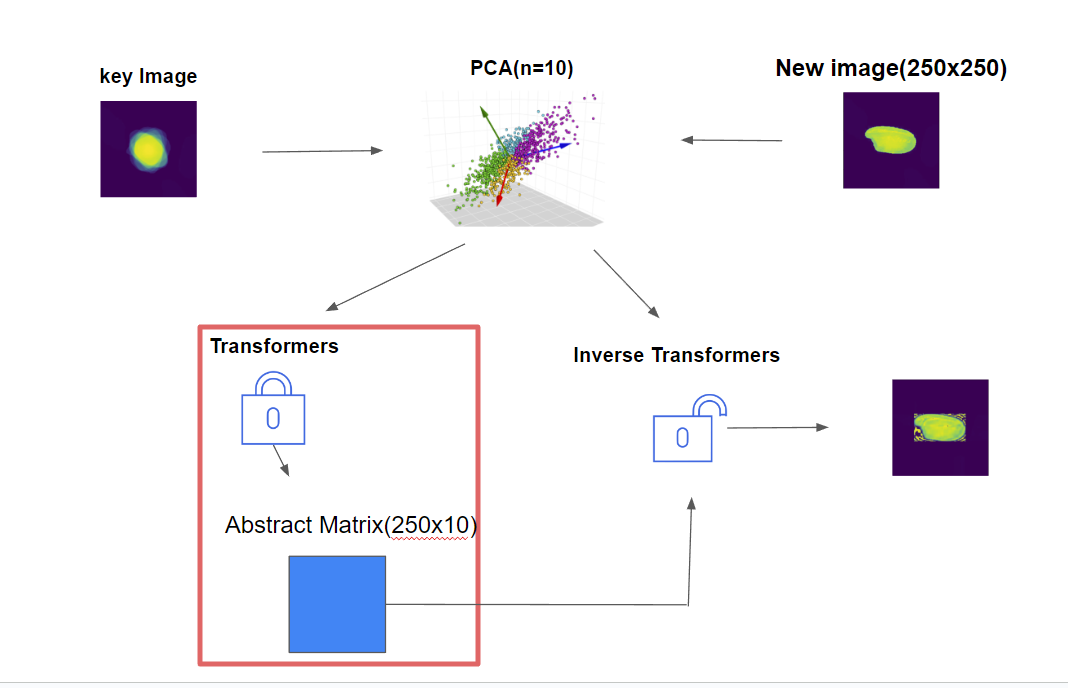

In [11]:
Evaluator.all_species

{'Karacadag': 0, 'Jasmine': 1, 'Ipsala': 2, 'Arborio': 3, 'Basmati': 4}

In [12]:
Karacadag = tranformers[0](Karacadag_array)
Karacadag.shape

(250, 10)

### Reversing process

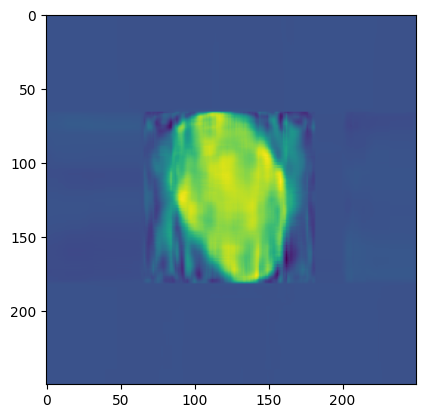

In [13]:
Karacadag_inverse = inverse_tranformers[0](Karacadag)
plt.imshow(Karacadag_inverse)

In [14]:
Karacadag_inverse.shape

(250, 250)

## What label is it ?

In [15]:
 Input   = keras.layers.Input(shape=(250,250,1),name='Input') 

 clayer0 = keras.layers.Convolution2D(25, kernel_size = 5, activation='relu',name='conv0' )(Input) 
 clayer1 = keras.layers.Convolution2D(50, kernel_size = 5, activation='relu',name='conv1' )(clayer0) 
 clayer2 = keras.layers.MaxPooling2D((5, 5),name='MaxPool0')(clayer1) 
 clayer3 = keras.layers.Flatten(name='Flatten')(clayer2) 


 Dense0  = keras.layers.Dense(75, activation = 'relu',name='Dense0')(clayer3)
 Drop0   = keras.layers.Dropout(rate=.2,name='Dropout0')(Dense0)
 Dense1  = keras.layers.Dense(50, activation = 'relu',name='Dense1')(Drop0)
 Output  = keras.layers.Dense(5,   activation = 'softmax',name = 'Output')(Dense1)


 Conv    = keras.Model(Input, Output,name='Convolution')


 keras.Model.load_weights(Conv,prodpath('Conv','fitted_models',ext=''))

In [16]:
probas = Conv.predict(Karacadag_inverse.reshape(1,250,250))

1/1 [==============================] - 1s 539ms/step


In [17]:
probas

array([[9.9998140e-01, 1.0671696e-05, 7.3170763e-06, 6.1671892e-07,
        7.7309110e-09]], dtype=float32)

<Axes: >

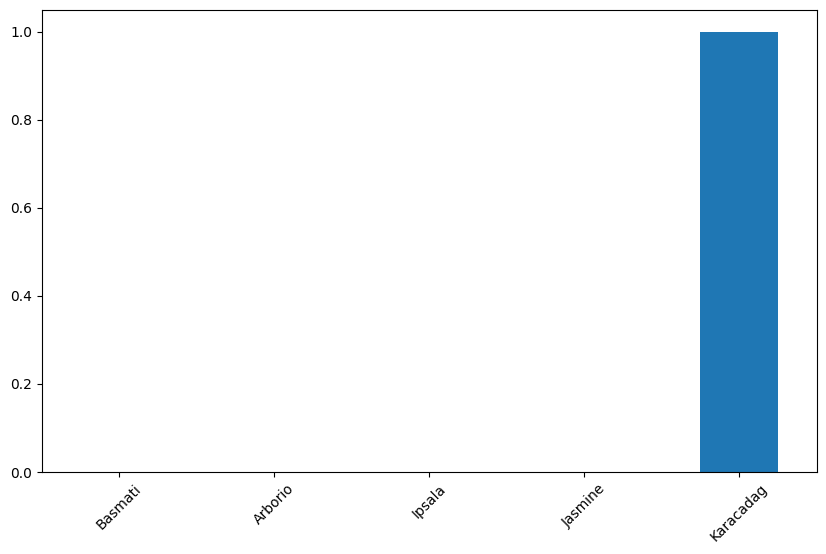

In [18]:
pandas.Series(dict(zip(Evaluator.all_species,probas[0]))).sort_values().plot(kind='bar',figsize=(10,6),rot=45)

# Final Test evaluation

In [19]:
X_test,y_test     = numpy.load(open(arrpath('gray','X_test'),'rb')),\
                          numpy.load(open(arrpath('gray','y_test'),'rb'))
X_test,y_test     = numpy.concatenate([X_test,numpy.load(open(arrpath('gray_enlarged','X_test'),'rb'))]),\
                       numpy.concatenate([y_test,numpy.load(open(arrpath('gray_enlarged','y_test'),'rb'))])
X_test,y_test     = numpy.concatenate([X_test,numpy.load(open(arrpath('gray_enlarged_pile','X_test'),'rb'))]).astype("float32"),\
                          numpy.concatenate([y_test,numpy.load(open(arrpath('gray_enlarged_pile','y_test'),'rb'))])
#scaling data
k = 100
m,M     = -1474.5641, 2537.4983
X_test -=m
X_test/=(M-m)

In [20]:
X_test.min(),X_test.max()

(0.00047887207, 0.993996)

In [21]:
X_test = joblib.load(prodpath('fit_pca','projections',ext='.joblib')).proj(X_test,k)

In [ ]:
X_test.shape

In [22]:
Input   = keras.Input(shape=(100),name='Input')
Dense0  = keras.layers.Dense(100, activation = 'relu',name='Hidden0')(Input)
Drop0   = keras.layers.Dropout(rate=.1,name='Dropout0')(Dense0)
Dense1  = keras.layers.Dense(50, activation = 'relu',name='Hidden1')(Drop0)
Output  = keras.layers.Dense(5,   activation = 'softmax',name = 'Output')(Dense1)
MLP     = keras.Model(Input, Output,name='MLPerceptron')
keras.Model.load_weights(MLP,prodpath('MLP','fitted_models',ext=''))


In [23]:
final_estimations = {
    'RadmonForest'      : joblib.load(prodpath('Forest','fitted_models',ext='.joblib')).predict(X_test).argmax(axis=1),
    'LogisticRegression': joblib.load(prodpath('Logistic','fitted_models',ext='.joblib')).predict(X_test),
    'MLP' : MLP.predict(X_test).argmax(axis=1)
    }

1211/1211 [==============================] - 2s 1ms/step


In [24]:
final_estimations = pandas.DataFrame(final_estimations)
final_estimations

,RadmonForest,LogisticRegression,MLP
0,4,4,4
1,4,4,4
2,3,3,3
3,4,4,4
4,3,3,3
...,...,...,...
38745,0,2,2
38746,2,4,2
38747,0,4,2
38748,2,3,2


In [ ]:
final_estimations.sum()

In [25]:
(final_estimations.apply(lambda c : c == y_test).sum()/len(y_test)).sort_values()

LogisticRegression    0.623406
RadmonForest          0.961161
MLP                   0.980852
dtype: float64